# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Поршнев Роман. Вариант №46.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навыки использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Возведение одночлена в степень имеет большое значение во многих разделах математики. Зачастую ставятся задачи, где нужно возвести число в достаточно большую степень. Например, стоит задача вычислить $ x^n $, где $ n \ge 10^9 $. Наивное решение такой задачи будет получено не раньше секунды при использовании любого компилятора. Однако, были разработы алгоритмы решения данной задачи за меньшее время: бинарный метод $SX$, бинарный метод возведения в степень справа налево, метод множителей и дерево степеней. <br>
Для оценки количества операций следует ввести следующие определения: <br>
$ \lambda(n) = \lfloor \log_2{n} \rfloor -$ уменьшенная на единицу длина бинарной записи числа $ n $. <br>
$ \nu(n) -$ вес Хэмиинга для бинарной записи $ n $, а именно, число единиц в бинарной записи.

### Бинарный метод $SX$
1. Число, в которое нужно возвести одночлен, представляется в двоичной системе счисления.
2. В двоичной записи отбрасывается старший бит.
3. В полученной двоичной записи бит, установленный в 1, интерпретируется как набор символов $SX$, а бит, установленный в 0, как $S$. По итогу получается строка из элементов $S$ и $X$.
4. Выполняется вычисление $ x^n $, где $S$ $-$ возведение в квадрат текущего знаечния, а $X$ $-$ умножение текущего значения на $x$. <br>

Число операций для данного метода: $ \lambda(n)  + \nu(n) - 1 $
### Бинарный метод возведения в степень справа налево
1. $ N:=n $, $ Y:= 1 $, $Z := x$
2. Если $ N -$ чётное, то $ N := \lfloor N / 2 \rfloor$, $Z := Z^2$, вернуться к пункту 2. <br>Если $N -$ нечётное, то то $ N := \lfloor N / 2 \rfloor$, $ Y := Z * Y$. Если $N = 0$, то переход к пункту 3, иначе $Z := Z^2$ и происходит возврат к пункту 2.
3. $ Y -$ ответ на задачу, алгоритм закончил работу.<br>

Число операций для данного метода: $ \lambda(n)  + \nu(n) $
### Метод множителей
1. Степень $ n $, в которую возводится одночлен $ x $, представляется следующим образом: $ n = pq $, где $p -$ наименьший простой множитель $ n $, $ q > 1$. То есть, $ x^n $ можно найти, вычислив $ x^p $ и возведя эту величину в степнь $ q $. 
2. Если $n -$ простое, то можно сначала вычислить $x^{n-1}$ и умножить его на $ x $.
3. При $n = 1$ получаем $x^n$ безо всяких вычислений.

### Дерево степеней
1. Построить $ k $-ый уровень дерева. Необходимо построить $ (k + 1) $-ый уровень.
2. Берём каждый узел $ n $ на $ k $-ом уровне слева направо и присоеднияем к нему снизу узлы $n + a_0n + a_1$, $n + a_2...n + a_1 = 2n$.
3. Порядок присоединения важен. Значения $\{a_i\}^{n-1}_{i=0}$, $a_0 = 1$ представляет собой путь от корня до узла $n$.
4. Если какой-то узел уже появлялся раньше в дереве, то он устраняется.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

### 1. Реализация бинарного метода $ SX $
Реализация данного метода выполнена строго по соответствующему алгоритму из Основных теоретических положений. <br>
Реализована функция для составления строки, состоящей из символов $S$ и $X$:

In [1]:
# Входные данные: степень, в которую нужно возвести x
# Выходные данные: строка из символов "S" и "X"
def composing_string_from_SX(n):
    n_binary = bin(n)[3:] # перевод степени одночлена в двоичную систему счисления без старшего бита
    SX_string = ''
    for bit in n_binary:
        if bit == '1':
            SX_string += 'SX'
        else:
            SX_string += 'S'
    return SX_string

Также реализована функция для интерпретациии строки, состоящей из символов $S$ и $X$ для вычисления значения $x^n$:

In [2]:
# Входные данные: строка из символов "S" и "X", одночлен, который нужно возвести в степень, необходимость в логах
# Выходные данные: возведённый в степень одночлен, количество итераций
# Стоить добавить, что количество итераций в данном методе == количеству операций
def binary_method_SX(SX_string, x, need_logs):
    count_iterations = 0
    monomial = x
    for i in range(len(SX_string)):
        if SX_string[i] == 'S':
            monomial *= monomial
        else:
            monomial *= x
        if need_logs:
            print(f"№ итерации: {i + 1}. Значение монома: {monomial}")
        count_iterations += 1
    return monomial, count_iterations

Для тестирования реализованного алгоритма были выбраны следующие степени $n$ для $x$: $7$, $99$, $777$.<br>

Пусть $n = 7$:

In [3]:
x = var('x')
SX_string = composing_string_from_SX(7)
print(f"Последовательность SX: {SX_string}")
binary_method_SX(SX_string, x, True)

Последовательность SX: SXSX
№ итерации: 1. Значение монома: x^2
№ итерации: 2. Значение монома: x^3
№ итерации: 3. Значение монома: x^6
№ итерации: 4. Значение монома: x^7


(x^7, 4)

Пусть $n = 99$:

In [4]:
SX_string = composing_string_from_SX(99)
print(f"Последовательность SX: {SX_string}")
binary_method_SX(SX_string, x, True)

Последовательность SX: SXSSSSXSX
№ итерации: 1. Значение монома: x^2
№ итерации: 2. Значение монома: x^3
№ итерации: 3. Значение монома: x^6
№ итерации: 4. Значение монома: x^12
№ итерации: 5. Значение монома: x^24
№ итерации: 6. Значение монома: x^48
№ итерации: 7. Значение монома: x^49
№ итерации: 8. Значение монома: x^98
№ итерации: 9. Значение монома: x^99


(x^99, 9)

Пусть $n = 777$:

In [5]:
SX_string = composing_string_from_SX(777)
print(f"Последовательность SX: {SX_string}")
binary_method_SX(SX_string, x, True)

Последовательность SX: SXSSSSSXSSSX
№ итерации: 1. Значение монома: x^2
№ итерации: 2. Значение монома: x^3
№ итерации: 3. Значение монома: x^6
№ итерации: 4. Значение монома: x^12
№ итерации: 5. Значение монома: x^24
№ итерации: 6. Значение монома: x^48
№ итерации: 7. Значение монома: x^96
№ итерации: 8. Значение монома: x^97
№ итерации: 9. Значение монома: x^194
№ итерации: 10. Значение монома: x^388
№ итерации: 11. Значение монома: x^776
№ итерации: 12. Значение монома: x^777


(x^777, 12)

Также реализованы функции для подсчёта количества операций в бинарном методе $SX$ исходя из теоретических и практических сведений. Ниже приведены функции для рассчёта $ \lambda(n) $ и $ \nu(n) $, что представляют собой теоретический анализ количества операций:

In [6]:
# Входные данные: степень одночлена
# Выходные данные: лямбда-функция для данной степень
def compute_lambda(n):
    return len(bin(n)[3:])
# Входные данные: степень одночлена
# Выходные данные: Вес хэмминга степени одночлена
def compute_nu(n):
    n_binary = bin(n)[2:]
    return n_binary.count('1')

Для тестирования правильности подсчёта количества операций теоретических методом и практическим были выбраны следующие степени $n$: $7$, $99$, $777$.<br>

Пусть $n = 7$:

In [7]:
SX_string = composing_string_from_SX(7)
if binary_method_SX(SX_string, x, False)[1] == compute_lambda(7) + compute_nu(7) - 1:
    print(f"Количество операций необходимых для вычисления монома: {compute_lambda(7) + compute_nu(7) - 1}")
else:
    print("Ошибка")

Количество операций необходимых для вычисления монома: 4


Пусть $n = 99$:

In [8]:
SX_string = composing_string_from_SX(99)
if binary_method_SX(SX_string, x, False)[1] == compute_lambda(99) + compute_nu(99) - 1:
    print(f"Количество операций необходимых для вычисления монома: {compute_lambda(99) + compute_nu(99) - 1}")
else:
    print("Ошибка")

Количество операций необходимых для вычисления монома: 9


Пусть $n = 777$:

In [9]:
SX_string = composing_string_from_SX(777)
if binary_method_SX(SX_string, x, False)[1] == compute_lambda(777) + compute_nu(777) - 1:
    print(f"Количество операций необходимых для вычисления монома: {compute_lambda(777) + compute_nu(777) -1}")
else:
    print("Ошибка")

Количество операций необходимых для вычисления монома: 12


####  Вывод.
В ходе изучения бинарного метода $SX$ было установлено, что данный алгоритм намного быстрее наивного алгоритма возведения в степень. Например, если стоит задача вычислить $x^n$ при $n = 777$, то бинарный метод $SX$ решит данную задачу за 12 операций, в то время как наивный алгоритм решит её за 776 операций. Также было установлено равенство практической оценки количества операций и теоретической. Реализованы и протеcтированы соответствующие функции для данного метода.

### 2. Реализация бинарного метода возведения в степень справа налево
Реализация данного метода выполнена строго по соответствующему алгоритму из Основных теоретических положений. <br>
Реализована функция бинарного метода возведения в степень справа налево:

In [10]:
# Входные данные: одночлен, степень, в которую нужно возвести одночлен, необходимость в логах
# Выходные данные: возведённый в степень n одночлен, значение Z после завершения работы алгоритма, кол-во операций, кол-во итераций
def binary_method_from_right_to_left(x, n, need_logs):
    N = n
    Y = 1
    Z = x
    i = 0
    count_operations = 0
    count_iterations = 0
    while N != 0:
        i += 1
        if N % 2 == 0:
            N = floor(N / 2)
            Z = Z ** 2
            count_operations += 1
        else:
            N = floor(N / 2)
            Y = Z * Y
            count_operations += 1
            if N != 0:
                Z = Z ** 2
                count_operations += 1
        if need_logs:
            print(f"№ итерации = {i} N = {N} Y = {Y} Z = {Z}")
        count_iterations += 1
    return Y, Z, count_operations, count_iterations

Пусть $n = 7$:

In [11]:
binary_method_from_right_to_left(x, 7, True)

№ итерации = 1 N = 3 Y = x Z = x^2
№ итерации = 2 N = 1 Y = x^3 Z = x^4
№ итерации = 3 N = 0 Y = x^7 Z = x^4


(x^7, x^4, 5, 3)

Таблица результата работы алгоритма при $n = 7$:

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 1          | 3          | $x$        | $x^{2}$    |
| 2          | 1          | $x^{3}$    | $x^{4}$    |
| 3          | 0          | $x^{7}$    | $x^{4}$    |

Пусть $n = 99$:

In [12]:
print(binary_method_from_right_to_left(x, 99, True))

№ итерации = 1 N = 49 Y = x Z = x^2
№ итерации = 2 N = 24 Y = x^3 Z = x^4
№ итерации = 3 N = 12 Y = x^3 Z = x^8
№ итерации = 4 N = 6 Y = x^3 Z = x^16
№ итерации = 5 N = 3 Y = x^3 Z = x^32
№ итерации = 6 N = 1 Y = x^35 Z = x^64
№ итерации = 7 N = 0 Y = x^99 Z = x^64
(x^99, x^64, 10, 7)


Таблица результата работы алгоритма при $n = 99$:

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 1          | 49         | $x$        | $x^{2}$    |
| 2          | 24         | $x^{3}$    | $x^{4}$    |
| 3          | 12         | $x^{3}$    | $x^{8}$    |
| 4          | 6          | $x^{3}$    | $x^{16}$   |
| 5          | 3          | $x^{3}$    | $x^{32}$   |
| 6          | 1          | $x^{35}$   | $x^{64}$   |
| 7          | 0          | $x^{99}$   | $x^{64}$   |

Пусть $n = 777$:

In [13]:
binary_method_from_right_to_left(x, 777, True)

№ итерации = 1 N = 388 Y = x Z = x^2
№ итерации = 2 N = 194 Y = x Z = x^4
№ итерации = 3 N = 97 Y = x Z = x^8
№ итерации = 4 N = 48 Y = x^9 Z = x^16
№ итерации = 5 N = 24 Y = x^9 Z = x^32
№ итерации = 6 N = 12 Y = x^9 Z = x^64
№ итерации = 7 N = 6 Y = x^9 Z = x^128
№ итерации = 8 N = 3 Y = x^9 Z = x^256
№ итерации = 9 N = 1 Y = x^265 Z = x^512
№ итерации = 10 N = 0 Y = x^777 Z = x^512


(x^777, x^512, 13, 10)

Таблица результата работы алгоритма при $n = 777$:

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 1          | 388        | $x$        | $x^{2}$    |
| 2          | 194        | $x$        | $x^{4}$    |
| 3          | 97         | $x$        | $x^{8}$    |
| 4          | 48         | $x^{9}$    | $x^{16}$   |
| 5          | 24         | $x^{9}$    | $x^{32}$   |
| 6          | 12         | $x^{9}$    | $x^{64}$   |
| 7          | 6          | $x^{9}$    | $x^{128}$  |
| 8          | 3          | $x^{9}$    | $x^{256}$  |
| 9          | 1          | $x^{265}$  | $x^{512}$  |
| 10         | 0          | $x^{777}$  | $x^{512}$  |

Для тестирования правильности подсчёта количества операций теоретических методом и практическим были выбраны следующие степени $n$: $7$, $99$, $777$.<br>

Пусть $n = 7$:

In [14]:
if binary_method_from_right_to_left(x, 7, False)[2] == compute_lambda(7) + compute_nu(7):
    print(f"Количество операций необходимых для вычисления монома: {compute_lambda(7) + compute_nu(7)}")
else:
    print("Ошибка")

Количество операций необходимых для вычисления монома: 5


Пусть $n = 99$:

In [15]:
if binary_method_from_right_to_left(x, 99, False)[2] == compute_lambda(99) + compute_nu(99):
    print(f"Количество операций необходимых для вычисления монома: {compute_lambda(99) + compute_nu(99)}")
else:
    print("Ошибка")

Количество операций необходимых для вычисления монома: 10


Пусть $n = 777$:

In [16]:
if binary_method_from_right_to_left(x, 777, False)[2] == compute_lambda(777) + compute_nu(777):
    print(f"Количество операций необходимых для вычисления монома: {compute_lambda(777) + compute_nu(777)}")
else:
    print("Ошибка")

Количество операций необходимых для вычисления монома: 13


Исходя из того, как устроен данный алгоритм, можно предположить, что после завершения его работы $Z = x^{2^{\lambda(n)}}$. Проверка данного предположения для $ 1 \leq n \leq 999 $ приведена ниже: 

In [17]:
for n in range(1, 1000):
    Z = x^2^compute_lambda(n) # предположение о значении Z после завершения работы алгоритма
    if Z != binary_method_from_right_to_left(x, n, False)[1]:
        print("Ошибка")

Справделиво утверждать, что $Z = x^{2^{\lambda(n)}}$ для всех $n \in \mathbb{N}$.

#### Вывод.
В ходе изучения бинарного метода возведения в степень справа налео было установлено, что данный алгоритм так же намного быстрее наивного алгоритма возведения в степень. Также было установлено равенство практической оценки количества операций и теоретической. Реализованы и протеcтированы соответствующие функции для данного метода. Также установлено, что в общем случае после завершения работы алгоритма значение $Z = x^{2^{\lambda(n)}}$. 

### 3. Сравнение бинарного метода $SX$ и метода возведения в степень справа налево
Исходя из теоретических сведений, количество операций умножения в бинарном методе $SX$ на 1 больше, чем в бинарном методе возведения в степень справа налево. Что касается количества итераций, бинарный метод $SX$ хуже бинарного метода возведения в степень справа налево, так как первый выигрывает лишь одну итерацию на числах $n = 2^i$, где $i \in \mathbb{N}$, и с ростом $n$ начинает сильно проигрывать второму методу при $n = 2^i - 1$. На остальных $n$ бинарный метод $SX$ в количестве итераций либо проигрывает бинарному методу возведения в степень справа налево, либо такой же. Так же стоит отметить то, что бинарный метод $SX$ дополнительно требует память для хранения строки из элементов $S$ и $X$ и итерации для её составления, поэтому бинарный метод $SX$ уступает в производительности методу возведения в степень справа налево. Сравнение двух методов для $1 \leq n \leq 35$ приведено ниже:

In [18]:
for n in range(1, 36):
    print(f"n = {n}")
    SX_string = composing_string_from_SX(n)
    print(f"\tКоличество итераций для бинарного метода SX: {binary_method_SX(SX_string, x, False)[1]}")
    print(f"\tКоличество итераций для бинарного метода справа налево: {binary_method_from_right_to_left(x, n, False)[3]}")

n = 1
	Количество итераций для бинарного метода SX: 0
	Количество итераций для бинарного метода справа налево: 1
n = 2
	Количество итераций для бинарного метода SX: 1
	Количество итераций для бинарного метода справа налево: 2
n = 3
	Количество итераций для бинарного метода SX: 2
	Количество итераций для бинарного метода справа налево: 2
n = 4
	Количество итераций для бинарного метода SX: 2
	Количество итераций для бинарного метода справа налево: 3
n = 5
	Количество итераций для бинарного метода SX: 3
	Количество итераций для бинарного метода справа налево: 3
n = 6
	Количество итераций для бинарного метода SX: 3
	Количество итераций для бинарного метода справа налево: 3
n = 7
	Количество итераций для бинарного метода SX: 4
	Количество итераций для бинарного метода справа налево: 3
n = 8
	Количество итераций для бинарного метода SX: 3
	Количество итераций для бинарного метода справа налево: 4
n = 9
	Количество итераций для бинарного метода SX: 4
	Количество итераций для бинарного метода 

### 4. Исследование метода множителей
Вычисление монома с помощью метода множителей для $n = \{7, 99, 777, 33\}$ приведено ниже.

Пусть $n = 7$:<br>
$x^7 = x^6 * x$<br>
$x^6 = (x^2)^3$<br>
$(x^2)^3 = (x^2)^2 * x^2$<br>
$(x^2)^2 = x^2 * x^2$<br>
$x^2 = x * x$<br>
$x^2-$ 1 операция<br>
$(x^2)^2 -$ 2 операции<br>
$(x^2)^3 -$ 3 операции<br>
$x^7 -$ 4 операции<br>
Итого: 4 операции.

Пусть $n = 99$:<br>
$x^{99} = (x^3)^{11}$<br>
$(x^3)^{11} = (x^3)^{10} * x^3$<br>
$(x^3)^{10} = ((x^3)^2)^5$<br>
$((x^3)^2)^5 = ((x^3)^2)^4 * (x^3)^2$<br>
$((x^3)^2)^4 = (((x^3)^2)^2)^2$<br>
$x^3 = x^2 * x$<br>
$x^2 = x * x$<br>
$x^2-$ 1 операция<br>
$x^3 -$ 2 операции<br>
$((x^3)^2) -$ 3 операции<br>
$(((x^3)^2)^2) -$ 4 операции<br>
$((((x^3)^2)^2)^2) -$ 5 операций<br>
$((x^3)^2)^5 -$ 6 операций<br>
$(x^3)^{11} -$ 7 операций<br>
Итого: 7 операций.

Пусть $n = 777$:<br>
$x^{777} = (x^3)^{111}$<br>
$(x^3)^{111} = ((x^3)^3)^{37}$<br>
$((x^3)^3)^{37} = ((x^3)^3)^{36} * (x^3)^3$<br>
$((x^3)^3)^{36} = (((x^3)^3)^2)^{18}$<br>
$((x^3)^3)^{18} = (((x^3)^3)^2)^{18}$<br>
$(((x^3)^3)^2)^{18} = ((((x^3)^3)^2)^2)^9$<br>
$((((x^3)^3)^2)^2)^9 = (((((x^3)^3)^2)^2)^3)^3$<br>
$(((((x^3)^3)^2)^2)^3)^3 = (((((x^3)^3)^2)^2)^3)^2 * ((((x^3)^3)^2)^2)^3$<br>
$(((((x^3)^3)^2)^2)^3)^2 = ((((x^3)^3)^2)^2)^3 * ((((x^3)^3)^2)^2)^3$<br>
$((((x^3)^3)^2)^2)^3 = ((((x^3)^3)^2)^2)^2 * (((x^3)^3)^2)^2$<br>
$((((x^3)^3)^2)^2)^2 = (((x^3)^3)^2)^2 * (((x^3)^3)^2)^2$<br>
$(((x^3)^3)^2)^2 = ((x^3)^3)^2 * ((x^3)^3)^2$<br>
$((x^3)^3)^2 = (x^3)^3 * (x^3)^3$<br>
$(x^3)^3 = (x^3)^2 * x^3$<br>
$(x^3)^2 = x^3 * x^3$<br>
$x^3 = x^2 * x$<br>
$x^2 = x * x$<br>
$x^2-$ 1 операция<br>
$x^3-$ 2 операции<br>
$(x^3)^2-$ 3 операции<br>
$(x^3)^3-$ 4 операции<br>
$((x^3)^3)^2-$ 5 операций<br>
$(((x^3)^3)^2)^2-$ 6 операций<br>
$((((x^3)^3)^2)^2)^2-$ 7 операций<br>
$((((x^3)^3)^2)^2)^3-$ 8 операций<br>
$(((((x^3)^3)^2)^2)^3)^2-$ 9 операций<br>
$(((((x^3)^3)^2)^2)^3)^3-$ 10 операций<br>
$((x^3)^3)^{37}-$ 11 операций<br>
Итого: 11 операций.

Пусть $n = 33$:<br>
$x^{33} = (x^3)^{11}$<br>
$(x^3)^{11} = (x^3)^{10} * x^3$<br>
$(x^3)^{10} = ((x^3)^2)^5$<br>
$((x^3)^2)^5 = ((x^3)^2)^4 * (x^3)^2$<br>
$((x^3)^2)^4 = (((x^3)^2)^2)^2$<br>
$x^3-$ 2 операции<br>
$(x^3)^2-$ 3 операции<br>
$((x^3)^2)^2-$ 4 операции<br>
$(((x^3)^2)^2)^2-$ 5 операций<br>
$((x^3)^2)^5-$ 6 операций<br>
$(x^3)^{11}-$ 7 операций<br>
Итого: 7 операций.

Количество операций в бинарном методе $SX$ при $n = 33$:

In [19]:
print(f"Количество операций в бинаром методе SX для n = {33}: {compute_lambda(33) + compute_nu(33) - 1}")

Количество операций в бинаром методе SX для n = 33: 6


Можно сделать вывод, что количество операций в бинаром методе $SX$ на 1 меньше, чем в методе множителей при $n = 33$.

#### Вывод.
В большинстве случаев метод множителей делает меньшее количество операций, чем бинарный метод $SX$, но первый метод сложнее в реализации.

### 5. Алгоритм ''дерева степеней"
Реализация данного метода представлена ниже:

In [20]:
import copy
# Входные данные: степень, в которую нужно возвести n и количество уровней, которое нужно построить
# Выходные данные: путь степеней, который нужно пройти, чтобы получить степень n и дерево
def make_degree_tree(n, k):
    tree = Graph()
    count_levels = -1
    paths_for_nodes = {1: [1]} # путь степеней, который нужно пройти, чтобы получить данную степень
    current_node = 1 # старт-узел
    nodes_queue = [1] # очередь узлов, которые нужно рассмотреть
    while count_levels < k - 1:
        current_node = nodes_queue.pop(0)
        if float(math.log2(current_node)).is_integer():
            count_levels = int(math.log2(current_node))
        path_for_current_node = paths_for_nodes[current_node]
        for node in path_for_current_node:
            if node + current_node not in paths_for_nodes.keys():
                nodes_queue.append(node + current_node) # добавление ребёнка в очередь
                path_for_new_node = copy.deepcopy(paths_for_nodes[current_node])
                path_for_new_node.append(node + current_node) # путь степеней, которые нужно пройти, чтобы дойти до данного ребёнка
                paths_for_nodes[node + current_node] = path_for_new_node
                tree.add_edge(current_node, current_node + node)
    tree_plot = tree.plot(layout='tree', tree_root=1, vertex_color = 'white', vertex_colors={'#bf616a': paths_for_nodes[n]})
    return paths_for_nodes[n], tree_plot

# Входные данные: дерево
def show_degree_tree(tree_plot):
    tree_plot.show()

Пусть $n = 40, k = 6$

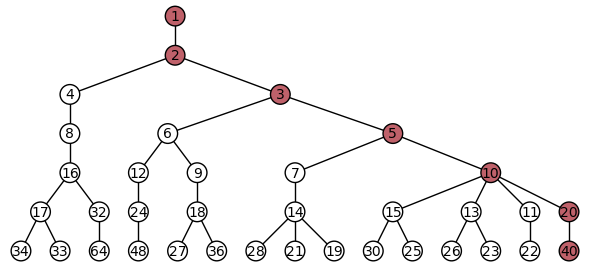

In [21]:
tree_plot = make_degree_tree(40, 6)[1]
show_degree_tree(tree_plot)

Пусть $n = 14, k = 6$

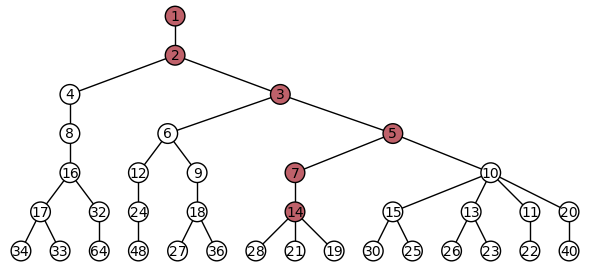

In [22]:
tree = make_degree_tree(14, 6)[1]
show_degree_tree(tree)

Пусть $n = 66, k = 7$

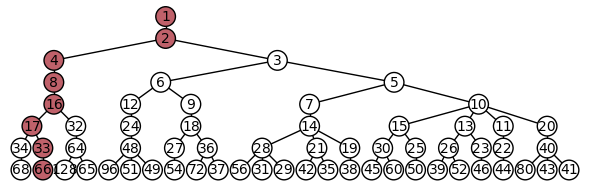

In [23]:
tree = make_degree_tree(66, 7)[1]
show_degree_tree(tree)

Следующая задача заключается в том, чтобы сравнить бинарный метод $SX$ и алгоритм "дерева степеней" для $1 \leq n \leq 35$. Реализация сравнения представлена ниже:

In [24]:
for n in range(1, 36):
    print(f"n = {n}")
    SX_string = composing_string_from_SX(n)
    print(f"\tКоличество операций для бинарного метода SX: {binary_method_SX(SX_string, x, False)[1]}")
    print(f"\tКоличество операций для 'дерева степеней': {len(make_degree_tree(n, 9)[0]) - 1}")

n = 1
	Количество операций для бинарного метода SX: 0
	Количество операций для 'дерева степеней': 0
n = 2
	Количество операций для бинарного метода SX: 1
	Количество операций для 'дерева степеней': 1
n = 3
	Количество операций для бинарного метода SX: 2
	Количество операций для 'дерева степеней': 2
n = 4
	Количество операций для бинарного метода SX: 2
	Количество операций для 'дерева степеней': 2
n = 5
	Количество операций для бинарного метода SX: 3
	Количество операций для 'дерева степеней': 3
n = 6
	Количество операций для бинарного метода SX: 3
	Количество операций для 'дерева степеней': 3
n = 7
	Количество операций для бинарного метода SX: 4
	Количество операций для 'дерева степеней': 4
n = 8
	Количество операций для бинарного метода SX: 3
	Количество операций для 'дерева степеней': 3
n = 9
	Количество операций для бинарного метода SX: 4
	Количество операций для 'дерева степеней': 4
n = 10
	Количество операций для бинарного метода SX: 4
	Количество операций для 'дерева степеней': 4

#### Вывод.
Бинарный метод $SX$ на некоторых значениях уступает алгоритму "дерева степеней" 1 операцию, но второй метод проигрывает по памяти и является более времязатратным. Так как бинарный метод $SX$ сравним по количеству операций с методом множителей и лучше бинарного метода возведения в степень справа налево, следовательно, самый дешёвым по количеству операций является алгоритм "дерева степеней" при условии, что дерево уже построено. 

## Выводы
В данной работе был изучен алгоритмический подход вычисления одночленов за минимальное количество операций, отточены навыки владения системой компьютерной алгебры SageMath и написания программ на языке Python.<br>
<br>
Были рассмотрены следующие алгоритмы: бинарный метод $SX$, бинарный метод возведения в степень справа налево, метод множителей и алгоритм "дерева степеней". Для каждого алгоритма было оценено количество операций, для первух двух, соответственно, количество итераций и для всех, кроме метода множителей, затраты по памяти. У каждого алгоритма, расмотренного в данной работе, есть как сильные стороны, так и слабые. Каждый метод протестирован. Для бинарного метода $SX$ и метода возведения в степень справа налево произведено сравнение теоретической и практической оценки количества операций.